In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.subplots as sp
import cufflinks as cf
from IPython.display import display,HTML

cf.set_config_file(sharing='public',theme='white',offline=True)  

In [2]:
df = pd.read_csv(r'Billionaires Statistics Dataset.csv')

In [3]:
df.head(3)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [4]:
df.isna().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [5]:
df.shape

(2640, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [7]:
df.dtypes

rank                                            int64
finalWorth                                      int64
category                                       object
personName                                     object
age                                           float64
country                                        object
city                                           object
source                                         object
industries                                     object
countryOfCitizenship                           object
organization                                   object
selfMade                                         bool
status                                         object
gender                                         object
birthDate                                      object
lastName                                       object
firstName                                      object
title                                          object
date                        

In [8]:
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [9]:
df.date = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M').dt.strftime('%m/%d/%Y')

In [11]:
df['country'].fillna('Unknown', inplace=True)
df['title'].fillna('Unknown', inplace=True)
df['organization'].fillna('Unknown', inplace=True)
df['residenceStateRegion'].fillna('Unknown', inplace=True)
df['state'].fillna('Unknown', inplace=True)
df[df['residenceStateRegion']] = df['gdp_country'].str.replace('$', '').str.replace(',', '').astype(float)

In [13]:
country_region_dict = {
    'France': 'Europe',
    'United States': 'North America',
    'Mexico': 'Latin America and the Caribbean',
    'India': 'Asia',
    'Spain': 'Europe',
    'China': 'Asia',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Italy': 'Europe',
    'Hong Kong': 'Asia',
    'Austria': 'Europe',
    'Japan': 'Asia',
    'Switzerland': 'Europe',
    'Australia': 'Oceania',
    'Indonesia': 'Asia',
    'Russia': 'Europe', 
    'Chile': 'Latin America and the Caribbean',
    'United Kingdom': 'Europe',
    'Israel': 'Asia',
    'Brazil': 'Latin America and the Caribbean',
    'Czech Republic': 'Europe',
    'Singapore': 'Asia',
    'Sweden': 'Europe',
    'Thailand': 'Asia',
    'Netherlands': 'Europe',
    'Nigeria': 'Africa',
    'Cyprus': 'Asia',
    'Malaysia': 'Asia',
    'United Arab Emirates': 'Asia',
    'South Africa': 'Africa',
    'New Zealand': 'Oceania',
    'Philippines': 'Asia',
    'Monaco': 'Europe',
    'Belgium': 'Europe',
    'South Korea': 'Asia',
    'Taiwan': 'Asia',
    'Norway': 'Europe',
    'Egypt': 'Africa',
    'Denmark': 'Europe',
    'Ireland': 'Europe',
    'Eswatini (Swaziland)': 'Africa',
    'Colombia': 'Latin America and the Caribbean',
    'Poland': 'Europe',
    'Ukraine': 'Europe',
    'Greece': 'Europe',
    'Turkey': 'Asia',
    'Argentina': 'Latin America and the Caribbean',
    'Georgia': 'Asia',
    'Portugal': 'Europe',
    'Kazakhstan': 'Asia',
    'Algeria': 'Africa',
    'Venezuela': 'Latin America and the Caribbean',
    'Vietnam': 'Asia',
    'Finland': 'Europe',
    'Belize': 'Latin America and the Caribbean',
    'Lebanon': 'Asia',
    'Oman': 'Asia',
    'Iceland': 'Europe',
    'Guernsey': 'Europe',
    'Liechtenstein': 'Europe',
    'Bulgaria': 'Europe',
    'Romania': 'Europe',
    'Zimbabwe': 'Africa',
    'Qatar': 'Asia',
    'Nepal': 'Asia',
    'Slovakia': 'Europe',
    'Morocco': 'Africa',
    'Hungary': 'Europe',
    'Tanzania': 'Africa',
    'Peru': 'Latin America and the Caribbean',
    'Barbados': 'Latin America and the Caribbean',
    'Macau': 'Asia',
    'Estonia': 'Europe',
    'St. Kitts and Nevis': 'Latin America and the Caribbean',
    'Armenia': 'Asia',
    'Bangladesh': 'Asia',
    'Panama': 'Latin America and the Caribbean',
    'Uzbekistan': 'Asia',
    'Bahamas': 'Latin America and the Caribbean',
    'Cayman Islands': 'Latin America and the Caribbean',
    'Latvia': 'Europe',
    'Bermuda': 'North America',
    'Luxembourg': 'Europe',
    'British Virgin Islands': 'Latin America and the Caribbean',
    'Cambodia': 'Asia',
    'Turks and Caicos Islands': 'Latin America and the Caribbean',
    'Uruguay': 'Latin America and the Caribbean',
    'Bahrain': 'Asia',
    'Andorra': 'Europe',
    'Unknown': 'Unknown'
}

df['regionOfCitizenship']=[country_region_dict[x] for x in df.countryOfCitizenship]

In [25]:
def format_final_worth(value):
    return f"${value} B"

df['Net worth in B'] = (df['finalWorth']/1000).apply(format_final_worth)



table = go.Figure(data=[go.Table(
    header=dict(values=['Rank', 'Nombre', 'Patrimonio', 'Edad', 'País', 'Compañía', 'Industria']),
    cells=dict(values=[df['rank'], df['personName'], df['Net worth in B'], df['age'], df['countryOfCitizenship'], df['source'], df['industries']])
)])

df = df.drop(columns=['Net worth in B'])

table.update_layout(width=1200, height=515)

table.show()

In [24]:
country_counts = df['countryOfCitizenship'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number of Billionaires']

country_counts['Rank'] = country_counts['Number of Billionaires'].rank(ascending=False, method='dense')
table = go.Figure(data=[go.Table(
    header=dict(values=['Rank', 'País', 'Milmillonarios']),
    cells=dict(values=[country_counts['Rank'], country_counts['Country'], country_counts['Number of Billionaires']])
)])

table.update_layout(width=1000, height=310)

table.show()

In [16]:
fig = px.choropleth(country_counts, 
                    locations="Country", 
                    locationmode="country names", 
                    color="Number of Billionaires", 
                    hover_name="Country", 
                    color_continuous_scale="Emrld",
                    title="Number of Billionaires by Country")

fig.update_layout(width=1000, height=600)
fig.show()


In [23]:
country_region_df = pd.DataFrame(list(country_region_dict.items()), columns=['Country', 'Region'])

countries_in_df = df['countryOfCitizenship'].unique()

countries_count_by_region = country_region_df[country_region_df['Country'].isin(countries_in_df)]\
    .groupby('Region').size().reset_index(name='Country Count')

billionaire_count_df  = df.regionOfCitizenship.value_counts().reset_index()
billionaire_count_df .columns = ['Region', 'Number of Billionaires']

merged_df = countries_count_by_region.merge(billionaire_count_df, on='Region', how='left').sort_values(by='Number of Billionaires',ascending=False)



table = go.Figure(data=[go.Table(
    header=dict(values=['Region', 'Continente', 'Milmillonarios']),
    cells=dict(values=[merged_df['Region'], merged_df['Country Count'], merged_df['Number of Billionaires']])
)])

table.update_layout(width=900, height=330)

table.show()


In [22]:
city_count_df  = df.city.value_counts().reset_index()
city_count_df.columns = ['City', 'Number of Billionaires']

city_count_df['Rank'] = city_count_df.index + 1

table = go.Figure(data=[go.Table(
    header=dict(values=['Rank','Ciudad','Milmillonarios']),
    cells=dict(values=[city_count_df['Rank'],city_count_df['City'], city_count_df['Number of Billionaires']])
)])

table.update_layout(width=700, height=310)

table.show()

In [21]:
city_count_df  = df.city.value_counts().reset_index()
city_count_df.columns = ['region', 'gender']

city_count_df['Rank'] = city_count_df.index + 1

table = go.Figure(data=[go.Table(
    header=dict(values=['Rank','Region','Género']),
    cells=dict(values=[city_count_df['Rank'],city_count_df['region'], city_count_df['gender']])
)])

table.update_layout(width=700, height=310)

table.show()

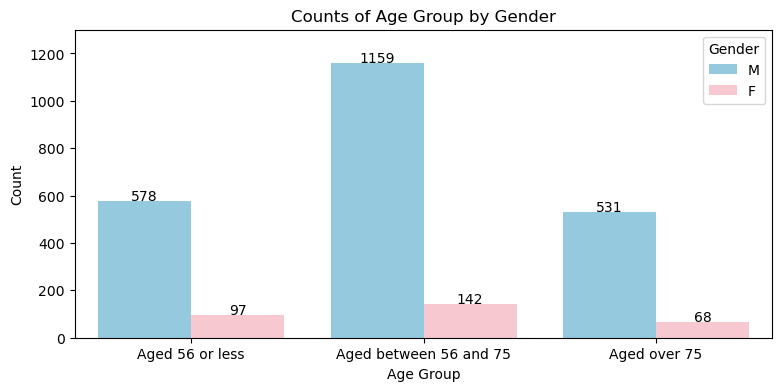

In [19]:
df['age_group'] = pd.cut(df['age'], bins=[0, 56, 75, float('inf')], labels=['Aged 56 or less', 'Aged between 56 and 75', 'Aged over 75'])

plt.figure(figsize=(9, 4))
ax = sns.countplot(x='age_group', hue='gender', data=df, palette={'M': 'skyblue', 'F': 'pink'})

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Counts of Age Group by Gender')

for p in ax.patches:
    h = p.get_height()
    w = p.get_width()
    plt.text(p.get_x() + w / 2, p.get_height() + 2, f'{int(h)}', ha='center')

plt.legend(title='Gender', labels=['M', 'F'])

df = df.drop(columns=['age_group'])
plt.ylim(0, 1300)
plt.show()



In [20]:
top_youngest=df[df['age']<=30].copy()
top_youngest=top_youngest.sort_values(by=['age']).sort_values(by=['finalWorth'],ascending=False)
top_youngest

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,population_country,latitude_country,longitude_country,regionOfCitizenship,Unknown,South,West,Midwest,Northeast,U.S. Territories
36,37,34700,Food & Beverage,Mark Mateschitz,30.0,Austria,Salzburg,Red Bull,Food & Beverage,Austria,...,8.877067e+06,47.516231,14.550072,Europe,3.767955e+11,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13
823,818,3500,Fashion & Retail,Clemente Del Vecchio,18.0,Italy,Milan,Eyeglases,Fashion & Retail,Italy,...,6.029740e+07,41.871940,12.567380,Europe,3.767955e+11,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13
825,818,3500,Fashion & Retail,Luca Del Vecchio,21.0,Italy,Milan,Eyeglasses,Fashion & Retail,Italy,...,6.029740e+07,41.871940,12.567380,Europe,3.767955e+11,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13
824,818,3500,Fashion & Retail,Leonardo Maria Del Vecchio,27.0,Italy,Milan,Eyeglasses,Fashion & Retail,Italy,...,6.029740e+07,41.871940,12.567380,Europe,3.767955e+11,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13
1159,1104,2700,Food & Beverage,Gustav Magnar Witzoe,29.0,Norway,Kverva,Fish farming,Food & Beverage,Norway,...,5.347896e+06,60.472024,8.468946,Europe,3.767955e+11,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13
1334,1312,2300,Fashion & Retail,Kevin David Lehmann,20.0,Unknown,NaN,Drugstores,Fashion & Retail,Germany,...,NaN,NaN,NaN,Europe,3.767955e+11,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13
1559,1516,2000,Manufacturing,Michal Strnad,30.0,Unknown,NaN,Defense Contracting,Manufacturing,Czech Republic,...,NaN,NaN,NaN,Europe,3.767955e+11,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13
1755,1725,1700,Media & Entertainment,Kim Jung-youn,19.0,Unknown,NaN,Online gaming,Media & Entertainment,South Korea,...,NaN,NaN,NaN,Asia,3.767955e+11,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13
1754,1725,1700,Media & Entertainment,Kim Jung-min,21.0,Unknown,NaN,Online gaming,Media & Entertainment,South Korea,...,NaN,NaN,NaN,Asia,3.767955e+11,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13
1768,1725,1700,Technology,Palmer Luckey,30.0,United States,Newport Beach,Virtual reality,Technology,United States,...,3.282395e+08,37.090240,-95.712891,North America,3.767955e+11,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13


In [68]:
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country',
       'Unknown', 'South', 'West', 'Midwest', 'Northeast', 'U.S. Territories',
       'regionOfCitizenship'],
      dtype='object')

In [ ]:
df.to_csv('clean_millionaires.csv', index=False)

In [70]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,population_country,latitude_country,longitude_country,Unknown,South,West,Midwest,Northeast,U.S. Territories,regionOfCitizenship
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,67059887.0,46.227638,2.213749,3.767955e+11,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,Europe
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,328239523.0,37.090240,-95.712891,3.767955e+11,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,North America
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,328239523.0,37.090240,-95.712891,3.767955e+11,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,North America
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,328239523.0,37.090240,-95.712891,3.767955e+11,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,North America
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,328239523.0,37.090240,-95.712891,3.767955e+11,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,North America


In [46]:
# Primero, ordena los datos por 'finalWorth' en orden descendente
df_sorted = df.sort_values(by='finalWorth', ascending=False)

# Luego, toma solo los primeros 10 registros
top_10 = df_sorted.head(10)

# Finalmente, traza el gráfico utilizando solo los 10 primeros registros
top_10.iplot(kind='bar', x='personName', y='finalWorth', 
             title='Top 10 Milmillonarios', theme='space', color='#1f77b4')


In [22]:
plot_top_n_billionaires(df, 10, column="finalWorth", title="Top 10 billionaires")

NameError: name 'plot_top_n_billionaires' is not defined

In [62]:
from urllib.request import urlopen
import json
import numpy as np

countries_geojson = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
# countries_geojson  = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"

with urlopen(countries_geojson) as response:
    countries = json.load(response)

plot_df = df.groupby("country_code", as_index=False)["finalWorth"].sum()

fig = go.Figure()


trace = go.Choroplethmapbox(
    geojson=countries, locations=plot_df["country_code"], z=np.log(plot_df["finalWorth"]),
    colorscale="Viridis",
    marker_opacity=0.5, marker_line_width=1)

fig.add_trace(trace)

fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=2.8, mapbox_center = {"lat": 48, "lon": 22})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_coloraxes(showscale=False)


In [26]:
df.head(3)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,population_country,latitude_country,longitude_country,Unknown,South,West,Midwest,Northeast,U.S. Territories,regionOfCitizenship
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,67059887.0,46.227638,2.213749,3.767955e+11,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,Europe
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,328239523.0,37.090240,-95.712891,3.767955e+11,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,North America
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,328239523.0,37.090240,-95.712891,3.767955e+11,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,2.142770e+13,North America


In [31]:
df.to_csv('clean_millionaires.csv', index=False)